## Implémentation de la partie 3 du projet

Le code qui suit résoudra le problème de sélection multicritère de projets donnés dans l'article.
A noter que pour son exécution, il suffit simplement que l'utilisateur choisisse le vecteur poids associé souhaité.
Ainsi, l'utilisateur doit entrer 1 pour le vecteur w=(2,1) et 2 pour le second vecteur à savoir w=(10,1)


In [6]:
import gurobipy as gp
from gurobipy import *
import numpy as np

#Commençons par déclarer nos données
u = [[19,6,17,2],[2,11,4,18]]#L'utilité des chefs de projets

cas = int(input("Choisir 1 pour le premier vecteur poids et 2 pour l'autre : "))
if cas == 1 : 
    W = [1,1]
else :
    W = [9,1]
    
c = [40,50,60,50]#Le coût de chaque projet
b = 100 #Le budget total 
n = 2 #Le nombre d'agents => Chefs de projets
p = 4 #Le nombre de projets au total

model = gp.Model('Partie 3 - Projet MOGPL')

#Déclaration de nos variables de décision 
x = np.array([model.addVar(vtype = GRB.BINARY, name="x%d" %(k+1)) for k in range(p)])

z = np.array([model.addVar(vtype = GRB.CONTINUOUS, lb = 0, name="z%d" %(i+1)) for i in range(n)])

r = np.array([model.addVar(vtype = GRB.CONTINUOUS, lb = - GRB.INFINITY, name = 'r%d' %(k+1)) for k in range(n)])

bik = np.array([[model.addVar(vtype = GRB.CONTINUOUS, lb = 0, name="b%d_%d" % (i+1,k+1)) for k in range(n)] for i in range(n)
])

#MAJ du modèle pour intégrer les nouvelles variables
model.update()

#Déclaration des contraintes : 
for i in range(n):
    model.addConstr(z[i]== quicksum(u[i][j]*x[j] for j in range(p)))
    
for k in range(n):
    for i in range(n):    
        model.addConstr( r[k] - bik[i][k] <= z[i])
        

model.addConstr(quicksum(c[k]*x[k] for k in range(p)) <= b)

#Déclaration de la fonction objectif :
fonction_obj = LinExpr();
fonction_obj =0

for k in range(n):
    fonction_obj += W[k]*( (k+1)*r[k] - quicksum(bik[i][k] for i in range(n)) )

model.setObjective(fonction_obj,GRB.MAXIMIZE)

# Resolution
model.optimize()


xfinal=np.array( [ x[i].x for i in range(p)]  )
zfinal=np.array([ z[i].x for i in range(n) ])
    

print('Le vecteur poids sélectionné est :',W)
print('La solution optimale du problème est (Les projets à sélectionner sont :)',xfinal)
print('La valeur optimale du problème est (la satisfaction max des deux agents respectivement): ', zfinal)


Choisir 1 pour le premier vecteur poids et 2 pour l'autre : 1
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[rosetta2])

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 7 rows, 12 columns and 26 nonzeros
Model fingerprint: 0x637ce592
Variable types: 8 continuous, 4 integer (4 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+01]
  Objective range  [1e+00, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+02, 1e+02]
Found heuristic solution: objective -0.0000000
Presolve removed 3 rows and 4 columns
Presolve time: 0.00s
Presolved: 4 rows, 8 columns, 18 nonzeros
Variable types: 0 continuous, 8 integer (4 binary)

Root relaxation: objective 6.660000e+01, 4 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   66.60000    0    3   -

### Résolution en maximisant la satisfaction moyenne des individus

Dans cette partie, nous n'aurons pas besoin de vecteur poids étant donné que nous maximisons la satisfaction moyenne des individus.
Les contraintes et variables resteront en revanche inchangées.

In [7]:
import gurobipy as gp
from gurobipy import *
import numpy as np

u = [[19,6,17,2],[2,11,4,18]]
c = [40,50,60,50]
b = 100
n = 2
p = 4

model = gp.Model('Partie 3 - Projet MOGPL')

x = np.array([model.addVar(vtype = GRB.BINARY, name="x%d" %(k+1)) for k in range(p)])

z = np.array([model.addVar(vtype = GRB.CONTINUOUS, lb = 0, name="z%d" %(i+1)) for i in range(n)])

r = np.array([model.addVar(vtype = GRB.CONTINUOUS, lb = - GRB.INFINITY, name = 'r%d' %(k+1)) for k in range(n)])

bik = np.array([[model.addVar(vtype = GRB.CONTINUOUS, lb = 0, name="b%d_%d" % (i+1,k+1)) for k in range(n)] for i in range(n)
])
model.update()

#Déclaration des contraintes : 
for i in range(n):
    model.addConstr(z[i]== quicksum(u[i][j]*x[j] for j in range(p)))
    
for k in range(n):
    for i in range(n):    
        model.addConstr( r[k] - bik[i][k] <= z[i])
        
model.addConstr(quicksum(c[k]*x[k] for k in range(p)) <= b)


fonction_obj = LinExpr();
fonction_obj = np.mean(z) #Le changement effectué, nous maximisons la satisfaction moyenne

model.setObjective(fonction_obj,GRB.MAXIMIZE)

    # Resolution
model.optimize()


xfinal=np.array( [ x[i].x for i in range(p)]  )
zfinal=np.array([ z[i].x for i in range(n) ])
    


print('La solution optimale du problème est (Les objets à prendre sont :)',xfinal)
print('La valeur optimale du problème est (la satisfaction max des deux agents respectivement): ', zfinal)


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[rosetta2])

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 7 rows, 12 columns and 26 nonzeros
Model fingerprint: 0xd59d6b5c
Variable types: 8 continuous, 4 integer (4 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+01]
  Objective range  [5e-01, 5e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+02, 1e+02]
Found heuristic solution: objective -0.0000000
Presolve removed 7 rows and 12 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 2: 21 -0 

Optimal solution found (tolerance 1.00e-04)
Best objective 2.100000000000e+01, best bound 2.100000000000e+01, gap 0.0000%
La solution optimale du problème est (Les objets à prendre sont :) [1. 0. 1. 0.]
La valeur optimale du problème est (la 

### Génération des matrices/vecteurs demandés

Nous allons dans un premier temps définir la fonction résolution afin d'éviter la redondance du code et de faciliter la lisibilité de ce dernier (nous avons simplement réécrit la modélisation/résolution établie plus haut)

In [8]:
import time 
def resolution(u,W,c,n,p,b):
    
    t1 = time.time()#Nous introduisons la notion du temps pour calculer le temps moyen des instances
    
    model = gp.Model('Partie 3 - Projet MOGPL')
    #Déclaration de nos variables de décision 
    x = np.array([model.addVar(vtype = GRB.BINARY, name="x%d" %(k+1)) for k in range(p)])
    z = np.array([model.addVar(vtype = GRB.CONTINUOUS, lb = 0, name="z%d" %(i+1)) for i in range(n)])
    r = np.array([model.addVar(vtype = GRB.CONTINUOUS, lb = - GRB.INFINITY, name = 'r%d' %(k+1)) for k in range(n)])
    bik = np.array([[model.addVar(vtype = GRB.CONTINUOUS, lb = 0, name="b%d_%d" % (i+1,k+1)) for k in range(n)] for i in range(n)])
    
    #MAJ du modèle pour intégrer les nouvelles variables
    model.update()

    #Déclaration des contraintes : 
    for i in range(n):
        model.addConstr(z[i]== quicksum(u[i][j]*x[j] for j in range(p)))
    for k in range(n):
        for i in range(n):    
            model.addConstr( r[k] - bik[i][k] <= z[i])
    
    model.addConstr(quicksum(c[k]*x[k] for k in range(p)) <= b)
    
    #Déclaration de la fonction objectif :

    fonction_obj = LinExpr();

    fonction_obj =0


    for k in range(n):
        fonction_obj += W[k]*( (k+1)*r[k] - quicksum(bik[i][k] for i in range(n)) )
    model.setObjective(fonction_obj,GRB.MAXIMIZE)
    # Resolution
    model.optimize()
    
    xfinal=np.array( [ x[i].x for i in range(p)]  )
    zfinal=np.array([ z[i].x for i in range(n) ])
    
    t2 = time.time()
    
    return xfinal,zfinal,t2-t1

Passons à présent à la génération des matrices et vecteurs demandés aléatoirement

Pour ce faire nous allons considérer deux cas distincts : 
     - Le premier pour b = 100 
     - Le second pour b généré aléatoirement en respectant la contrainte b = 1/2 somme des ck

In [27]:
#Cas où b reste fixe, c'est à dire b = 100
Cout=[]
b = 100
P=[] #Générer des poids 
U = []
n= 5
p = 10
for i in range(10) : 
    U.append(np.random.randint(500,high=None,size=(n,p)))
    W=[np.random.randint(20)]
    C = [np.random.randint(100)]
    for j in range(1,p):
        C.append(np.random.randint(100))
        w = np.random.randint(20)
        while(w > W[j-1]):
            w = np.random.randint(20)
        W.append(w)
        wbis = []
        for i in range(len(W)-1):
            wbis.append (W[i]-W[i+1])
        wbis.append(W[len(W)-1])
    P.append(wbis)
   
    Cout.append(C)
    #b.append(0.5 * np.sum(np.array(C)))

T = []

for i in range(10):
    (x,z,t)= resolution(U[i],P[i],Cout[i],n,p,b)
    T.append(t)
    
print("Le temps moyen est : ",np.mean(T))
print("Le vecteur temps des 10 instances",T)

Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[rosetta2])

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 31 rows, 45 columns and 140 nonzeros
Model fingerprint: 0xf782fb58
Variable types: 35 continuous, 10 integer (10 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+02]
  Objective range  [9e+00, 2e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+02, 1e+02]
Found heuristic solution: objective -0.0000000
Presolve removed 20 rows and 24 columns
Presolve time: 0.00s
Presolved: 11 rows, 21 columns, 80 nonzeros
Variable types: 6 continuous, 15 integer (10 binary)

Root relaxation: objective 1.934128e+04, 7 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 19341.2837    0    8   -0.00000 19341.2837      -     -    0s
H    0     0 

Presolve time: 0.00s
Presolved: 21 rows, 28 columns, 109 nonzeros
Variable types: 12 continuous, 16 integer (10 binary)

Root relaxation: objective 2.428760e+04, 17 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 24287.6000    0    7   -0.00000 24287.6000      -     -    0s
H    0     0                    15065.000000 24287.6000  61.2%     -    0s
H    0     0                    20411.000000 24287.6000  19.0%     -    0s
H    0     0                    21336.000000 24287.6000  13.8%     -    0s

Cutting planes:
  Gomory: 1
  Cover: 1
  MIR: 1
  StrongCG: 1

Explored 1 nodes (17 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 8 (of 8 available processors)

Solution count 4: 21336 20411 15065 -0 

Optimal solution found (tolerance 1.00e-04)
Best objective 2.133600000000e+04, best bound 2.133600000000e+04, ga

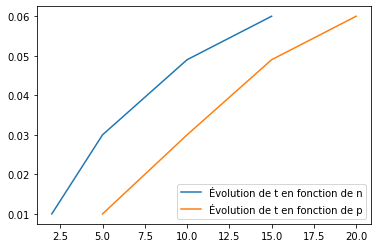

In [29]:
import matplotlib.pyplot as plt

n = np.array([2,5,10,15])
p = np.array([5,10,15,20])
y = np.array([0.01,0.03,0.049,0.06]) #Les temps moyens obtenus pour chaque couple
plt.plot(n, y, label="Évolution de t en fonction de n")
plt.plot(p, y,label="Évolution de t en fonction de p")
plt.legend()
plt.savefig('Tracé pour b fixe.png', dpi=300, bbox_inches='tight')
plt.show()

In [31]:
Cout=[]
b = []
P=[] #Générer des poids 
U = []


for i in range(10) : 
    U.append(np.random.randint(500,high=None,size=(n,p)))
    W=[np.random.randint(20)]
    C = [np.random.randint(100)]
    for j in range(1,p):
        C.append(np.random.randint(100))
        w = np.random.randint(20)
        while(w > W[j-1]):
            w = np.random.randint(20)
        W.append(w)
    P.append(W)
    Cout.append(C)
    b.append(0.5 * np.sum(np.array(C)))
        
#print(U)
#print(Cout)
#print(b)



In [38]:
#Cas où les b changent à cause de l'ajout de la contraine 
T = []
n= 2
p = 5
for i in range(10):
    (x,z,t)= resolution(U[i],P[i],Cout[i],n,p,b[i])
    T.append(t)
    
print("Le temps moyen est : ",np.mean(T))
print("Le vecteur temps des 10 instances",T)



Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[rosetta2])

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 7 rows, 13 columns and 29 nonzeros
Model fingerprint: 0xde94a57a
Variable types: 8 continuous, 5 integer (5 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+02]
  Objective range  [3e+00, 6e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [5e+02, 5e+02]
Found heuristic solution: objective -0.0000000
Presolve removed 4 rows and 4 columns
Presolve time: 0.00s
Presolved: 3 rows, 9 columns, 16 nonzeros
Variable types: 0 continuous, 9 integer (5 binary)

Root relaxation: objective 1.022700e+04, 3 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    10227.000000 10227.0000  0.00%     -    0s

Explored 1 nodes (3 sim


    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    29672.000000 29672.0000  0.00%     -    0s

Explored 1 nodes (1 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 8 (of 8 available processors)

Solution count 2: 29672 -0 

Optimal solution found (tolerance 1.00e-04)
Best objective 2.967200000000e+04, best bound 2.967200000000e+04, gap 0.0000%
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[rosetta2])

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 7 rows, 13 columns and 29 nonzeros
Model fingerprint: 0x60089971
Variable types: 8 continuous, 5 integer (5 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+02]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [5e+02, 5e+02]
Found heuristic solution: objective 

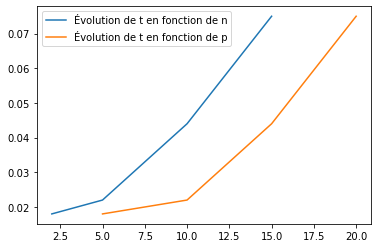

In [36]:
import matplotlib.pyplot as plt

n = np.array([2,5,10,15])
p = np.array([5,10,15,20])
y = np.array([0.018,0.022,0.044,0.075]) #Les temps moyens obtenus pour chaque couple
plt.plot(n, y, label="Évolution de t en fonction de n")
plt.plot(p, y,label="Évolution de t en fonction de p")
plt.legend()
plt.savefig('Tracé pour b variable.png', dpi=300, bbox_inches='tight')
plt.show()